<a href="https://colab.research.google.com/github/Amarsinh0/PROJECT_WORK/blob/main/project4_YouTube_Trending_Videos_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **project: YouTube Trending Videos Analysis**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json


In [ ]:
df = pd.read_csv("/content/USvideos.csv",error_bad_lines=False)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Now  read the data and set a few configuration options just to improve visualization plots:

In [ ]:
df = pd.read_csv("USvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [ ]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

# **Data Exploration**
The description column has some null values. These are some of the rows with null description values. So, to do some sort of data cleaning and to get rid of those null values, I’m going to put an empty string in place of each null value in the Description column:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
df["description"] = df["description"].fillna(value="")

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


# Observations from the above table:


1)The average number of views of a trending video is 2,360,784. The median value of the number of views is 681,861, which means that half of the trending videos have less than this number and the other half have views greater than this number.

2) The average number of likes for a trending video is 74,266, while the average number of likes is 3,711.


3)The average number of comments is 8,446 while the median is 1,856.

# Data Visualization
Now we want to see how many trending video titles have at least one uppercase word (eg WHAT). To do this, we’ll add a new variable to the dataset whose value is True if the video title contains at least one uppercase word, and False otherwise

In [ ]:

# Set a font family that is available on your system
plt.rcParams['font.family'] = 'sans-serif'  # Use a sans-serif font like Arial

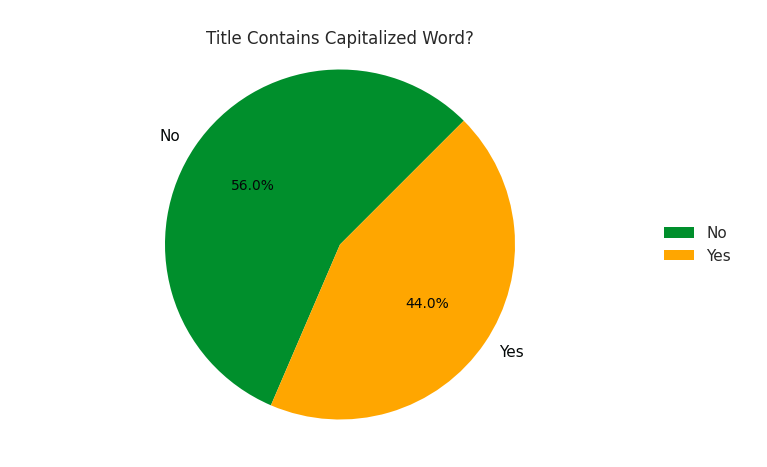

In [ ]:

# Set a font family that is available on your system
plt.rcParams['font.family'] = 'sans-serif'  # Use a sans-serif font like Arial

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()

# Calculate percentages for the labels
total_count = sum(value_counts.values())
percentages = [(count / total_count) * 100 for count in value_counts.values()]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    value_counts.values(),
    labels=['No', 'Yes'],
    colors=['#008f2c', '#ffa600'],
    autopct=lambda p: f'{p:.1f}%',
    textprops={'color': '#040808'},
    startangle=45,
)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

# Move the legend outside the pie chart
ax.legend(wedges, ['No', 'Yes'], loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



### We can see that 44% of trending video titles contain at least one word in all caps. We will use our added variable later to analyze the correlation between the variables.

### Let’s add another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

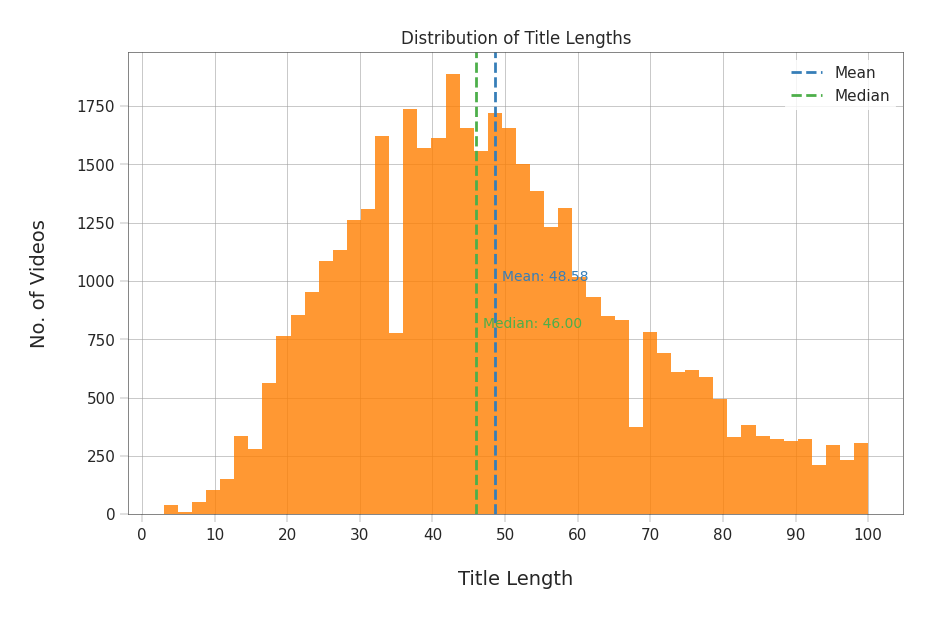

In [ ]:


# Calculate title lengths and store them in the DataFrame
df["title_length"] = df["title"].apply(len)

# Set color palette for the plot
PLOT_COLORS = sns.color_palette("Set1")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of title lengths
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 0.8}, ax=ax)

# Calculate and annotate mean and median
mean_length = df["title_length"].mean()
median_length = df["title_length"].median()
ax.axvline(mean_length, color=PLOT_COLORS[1], linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(median_length, color=PLOT_COLORS[2], linestyle='dashed', linewidth=2, label='Median')
ax.text(mean_length + 1, 1000, f'Mean: {mean_length:.2f}', color=PLOT_COLORS[1])
ax.text(median_length + 1, 800, f'Median: {median_length:.2f}', color=PLOT_COLORS[2])

# Set labels, title, and xticks
ax.set(xlabel="Title Length", ylabel="No. of Videos", title="Distribution of Title Lengths")
ax.set_xticks(range(0, 110, 10))

# Add legend
ax.legend()

# Show the plot
plt.show()


We can see that the videos title length distribution looks like a normal distribution, where most videos have a title length of around 30-60 characters.with mean about 48, median about 46  

# **Now, let’s draw a scatter plot to analyze the relationship between the title length and the number of views:**

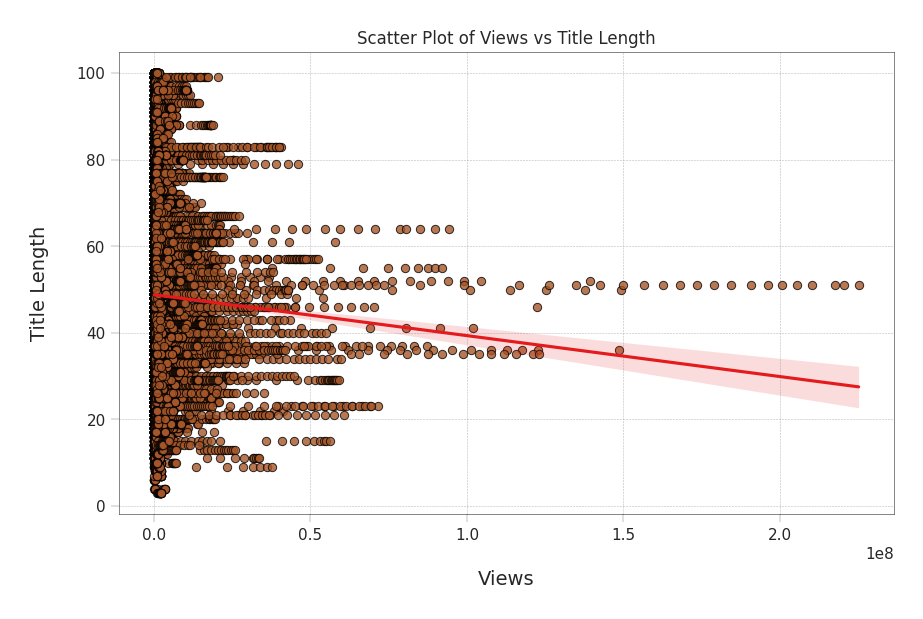

In [ ]:


# Set color palette for the plot
PLOT_COLORS = sns.color_palette("Set1")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot with color-coding and regression lines
sns.regplot(x='views', y='title_length', data=df, scatter_kws={'color': PLOT_COLORS[6], 'edgecolors': '#000000', 'linewidths': 0.7},
            line_kws={'color': PLOT_COLORS[0]}, ax=ax)

# Set labels and title
ax.set(xlabel="Views", ylabel="Title Length", title="Scatter Plot of Views vs Title Length")

# Improve readability by adding a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 33 and 55 characters or so.

# **Youtube Trending Videos Analysis: Correlation**

### see how the variables in the dataset correlate to each other: for example, we would like to see how views and likes correlate, meaning that views and likes increase and decrease together

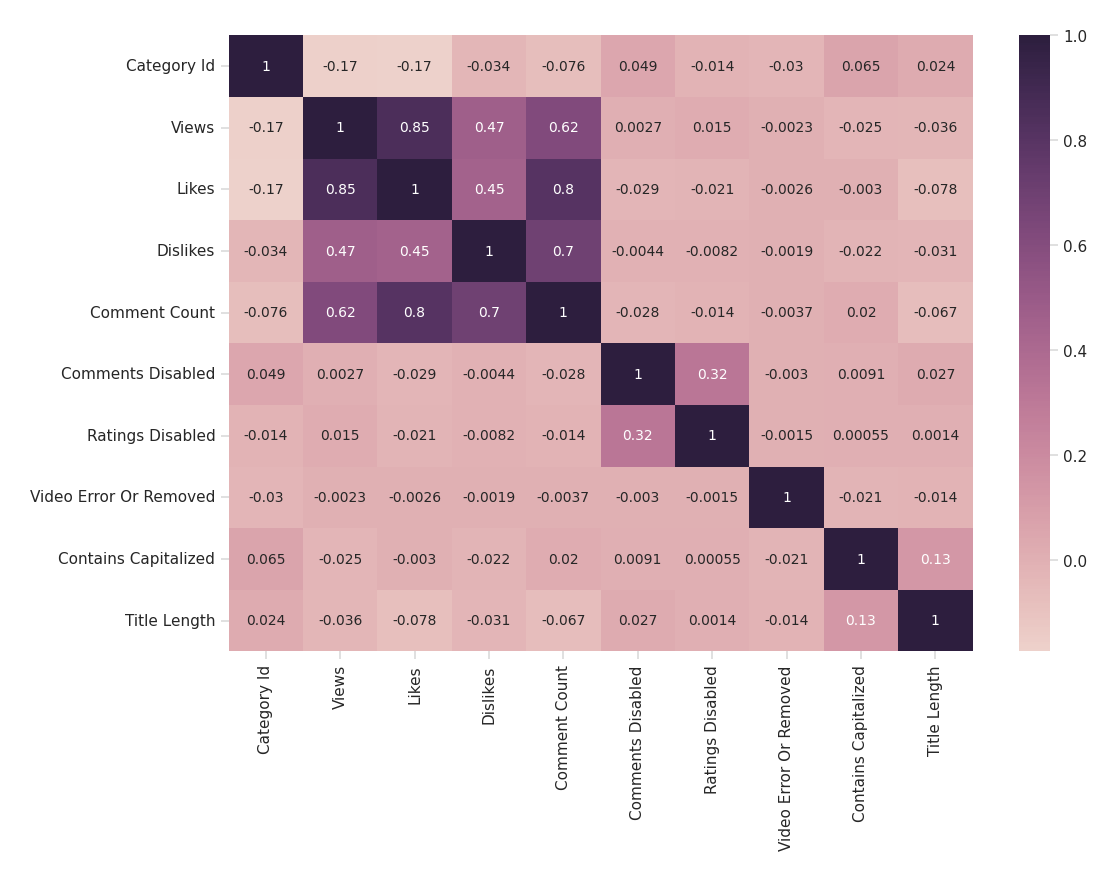

In [ ]:

labels = [x.replace('_', ' ').title() for x in
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(12,8))
x = sns.heatmap(df.corr(), annot=True, xticklabels=labels, yticklabels=labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

### The correlation map and correlation table above indicate that views and likes are strongly positively correlated.



### Let’s see if some words are used meaningfully in trending video titles. Let’s draw a word cloud for the titles of our trending videos, which is a way to visualize the most common words in the titles; the more common the word, the larger its font-size:

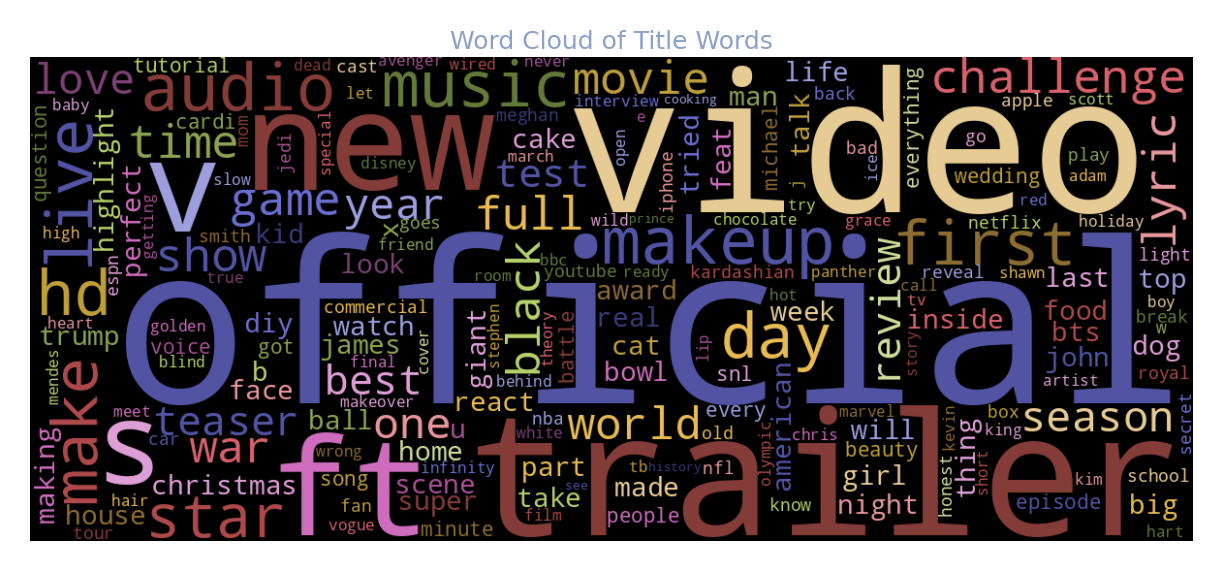

In [ ]:

from wordcloud import WordCloud


# Set color palette for the word cloud
PLOT_COLORS = sns.color_palette("Set2")

# Convert title words to a single string
title_words = " ".join(df["title"].apply(lambda x: x.lower()))

# Create the word cloud
wc = WordCloud(width=1200, height=500,
               collocations=False, background_color="black",
               colormap="tab20b").generate(title_words)

# Create the plot
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud of Title Words", fontsize=18, color=PLOT_COLORS[2])
plt.axis("off")

# Display the plot
plt.show()
